In [2]:
import os
import sys
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="4";


%load_ext autoreload
%autoreload 2
from CW import CW
from FGSM import FGSM
from OPT_attack import OPT_attack
from OPT_attack_polar import OPT_attack_polar
from OPT_attack_polar_GD import OPT_attack_polar_GD
from OPT_attack_lsq import OPT_attack_lsq
from OPT_attack_polar_lsq import OPT_attack_polar_lsq
from OPT_attack_GD import OPT_attack_GD
from OPT_genattack import OPT_genattack
from OPT_attack_sign_SGD import OPT_attack_sign_SGD
from OPT_attack_sign_SGD_lf import OPT_attack_sign_SGD_lf
from ZOO import ZOO
from OPT_attack_lf import OPT_attack_lf
from nes_attack import NES
from models import PytorchModel
import torch
from allmodels import MNIST, load_model, load_mnist_data, load_cifar10_data, CIFAR10
import os
import numpy as np
import matplotlib.pyplot as plt

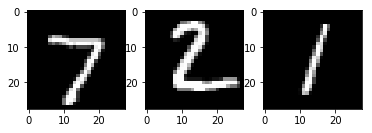

In [3]:
net = MNIST()
net.cuda()
net = torch.nn.DataParallel(net, device_ids=[0])
# print(net)
load_model(net,'mnist_gpu.pt')
net.eval()
model = net.module if torch.cuda.is_available() else net
# model = model.cpu()
train_loader, test_loader, train_dataset, test_dataset = load_mnist_data()

X0, Y0 = None, None
X1, Y1 = None, None
X2, Y2 = None, None
for i, (xi,yi) in enumerate(test_loader):
    if i==0:
        X0, Y0 = xi, yi
    if i==1:
        X1, Y1 = xi, yi
    if i==2:
        X2, Y2 = xi, yi
    if i==10:
        break
        
amodel = PytorchModel(model, bounds=[0,1], num_classes=10)

def plot_adv(X, adv):
    plt.subplot(1,2,1)
    plt.imshow(X[0][0], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(adv.cpu()[0][0], cmap='gray')
    plt.show()

# Plot the sample images
plt.subplot(1,3,1)
plt.imshow(X0[0][0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(X1[0][0], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(X2[0][0], cmap='gray')
plt.show()

### Baseline distortions for 3 examples (Original Randomized Gradient Free optimization)

In [3]:
# These distortions were calculated by taking average of 10 trials for each example
# using the randomized gradient free method.
d0 = (1.5292 + 1.5095 + 1.4743 + 1.3108 + 1.2816 + 1.4416 + 1.5323 + 1.3404 + 1.3365 + 1.3819)/10
d1 = (1.2531 + 1.3640 + 1.2929 + 1.2826 + 1.2985 + 1.3726 + 1.3016 + 1.2917 + 1.2976 + 1.2911)/10
d2 = (0.7499 + 0.7520 + 0.7615 + 0.7599 + 0.7609 + 0.7635 + 0.7450 + 0.7497 + 0.8018 + 0.7475)/10
print("d0 ", d0)
print("d1 ", d1)
print("d3 ", d2)

d0  1.41381
d1  1.30457
d3  0.7591699999999999


### Untargeted

/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


Searching for the initial direction on 100 random directions: 
--------> Found distortion 0.5582
--------> Found distortion 0.4907
--------> Found distortion 0.4326
--------> Found distortion 0.4239
--------> Found distortion 0.3812
==========> Found best distortion 0.3812 in 0.4093 seconds using 278 queries
Iteration  10 distortion 0.2976 num_queries 1198
Iteration  20 distortion 0.2790 num_queries 2642
Iteration  30 distortion 0.2708 num_queries 4202
Iteration  40 distortion 0.2665 num_queries 5692
Iteration  50 distortion 0.2635 num_queries 7346
Iteration  60 distortion 0.2539 num_queries 9029
Iteration  70 distortion 0.2492 num_queries 11202
Iteration  80 distortion 0.2465 num_queries 13652
Iteration  90 distortion 0.2453 num_queries 16192
Iteration 100 distortion 0.2439 num_queries 18426
Iteration 110 distortion 0.2411 num_queries 20721
Iteration 120 distortion 0.2386 num_queries 23268
Iteration 130 distortion 0.2363 num_queries 25653
Iteration 140 distortion 0.2359 num_queries 27

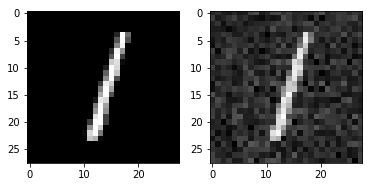

In [24]:
attack = OPT_attack_lf(amodel)
adv, dist = attack(X2.cuda(), Y2.cuda(), seed=17)
plot_adv(X2, adv)

/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


Searching for the initial direction on 100 random directions: 
--------> Found distortion 0.5582
--------> Found distortion 0.4907
--------> Found distortion 0.4326
--------> Found distortion 0.4239
--------> Found distortion 0.3812
==========> Found best distortion 0.3812 in 0.3886 seconds using 278 queries
Iteration   1 distortion 0.3271 num_queries 608
Iteration   6 distortion 0.2389 num_queries 1997
Iteration  11 distortion 0.2247 num_queries 3253
Iteration  16 distortion 0.2116 num_queries 4503
Iteration  21 distortion 0.1991 num_queries 5707
Iteration  26 distortion 0.1896 num_queries 6939
Iteration  31 distortion 0.1864 num_queries 8078
Iteration  36 distortion 0.1841 num_queries 9199
Iteration  41 distortion 0.1821 num_queries 10388
Iteration  46 distortion 0.1797 num_queries 11544
Iteration  51 distortion 0.1773 num_queries 12682
Iteration  56 distortion 0.1695 num_queries 13882
Iteration  61 distortion 0.1648 num_queries 15082
Iteration  66 distortion 0.1636 num_queries 16225

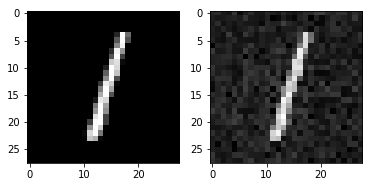

In [25]:
attack = OPT_attack_sign_SGD_lf(amodel)
adv_sign, dist_sign = attack(X2.cuda(), Y2.cuda(), seed=17)
plot_adv(X2, adv_sign)

### Targeted

Targeted attack - Source: 1 and Target: 4 Seed: 10
Searching for the initial direction on 100 samples: 
--------> Found distortion 0.2617
--------> Found distortion 0.2187
--------> Found distortion 0.1623


/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


--------> Found distortion 0.1433
--------> Found distortion 0.1412
--------> Found distortion 0.1365
==========> Found best distortion 0.1365 in 1.6196 seconds using 1129 queries
Iteration  10 distortion 0.1359 num_queries 2464
Iteration  20 distortion 0.1358 num_queries 5625
Iteration  30 distortion 0.1358 num_queries 8817
Iteration  40 distortion 0.1358 num_queries 12979
Iteration  50 distortion 0.1358 num_queries 17065
Iteration  60 distortion 0.1357 num_queries 21349
Iteration  70 distortion 0.1357 num_queries 25507
Iteration  80 distortion 0.1357 num_queries 29575
Iteration  90 distortion 0.1357 num_queries 33733
Iteration 100 distortion 0.1357 num_queries 37801
Iteration 110 distortion 0.1357 num_queries 42742
Iteration 120 distortion 0.1357 num_queries 47740
Iteration 130 distortion 0.1357 num_queries 52885

Adversarial Example Found Successfully: distortion 0.1357 target 4 queries 55608 
Time: 77.8848 seconds


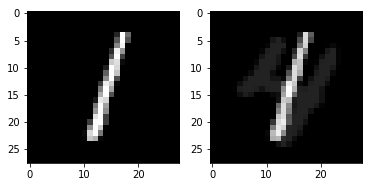

In [26]:
attack = OPT_attack_lf(amodel, train_dataset=train_dataset)
target = 4
adv, dist = attack(X2.cuda(), Y2.cuda(), target=target*torch.ones(1, dtype=torch.long).cuda(), seed=10)
plot_adv(X2, adv)

Targeted attack - Source: 1 and Target: 4 Seed: 10
Searching for the initial direction on 100 samples: 
--------> Found distortion 0.2617
--------> Found distortion 0.2187
--------> Found distortion 0.1623


/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


--------> Found distortion 0.1433
--------> Found distortion 0.1412
--------> Found distortion 0.1365
==========> Found best distortion 0.1365 in 1.6587 seconds using 1129 queries
Iteration   1 distortion 0.136040 num_queries 1351
Iteration   6 distortion 0.135895 num_queries 2516
Iteration  11 distortion 0.135756 num_queries 3714
Iteration  16 distortion 0.135732 num_queries 4846
Iteration  21 distortion 0.135692 num_queries 6000
Iteration  26 distortion 0.135626 num_queries 7198
Iteration  31 distortion 0.135589 num_queries 8330
Iteration  36 distortion 0.135532 num_queries 9495
Iteration  41 distortion 0.135515 num_queries 10770
Iteration  46 distortion 0.135509 num_queries 11980
Iteration  51 distortion 0.135507 num_queries 13134
Iteration  56 distortion 0.135503 num_queries 14288
Iteration  61 distortion 0.135502 num_queries 15456
Iteration  66 distortion 0.135501 num_queries 16942
Iteration  71 distortion 0.135501 num_queries 19034
Iteration  76 distortion 0.135501 num_queries 21

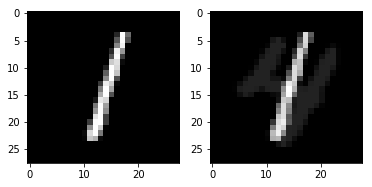

In [29]:
attack = OPT_attack_sign_SGD_lf(amodel, train_dataset=train_dataset)
target = 4
adv, dist = attack(X2.cuda(), Y2.cuda(), target=target*torch.ones(1, dtype=torch.long).cuda(), seed=10)
plot_adv(X2, adv)